# Derivados Financieros 2022 - Clase 3



Plan de la clase:

    1) Modelo Binomial
    2) Modificacion para ejercicio temprano (Americanas)
    3) Mercado vs Modelo

## 1) Modelo Binomial

In [1]:
import math
import numpy as np

import sys
sys.path.append('..')

from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Definicion:
    Calculador del precio de una opcion Europea con el modelo del Arbol Binomial (CRR)

Inputs:
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de pasos del arbol binomial

Outputs:
    - precio_BIN: float - Precio del contrato


In [2]:
#Paramtros del metodo

tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 20


precio = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos)
precio

12.213215959513816

## Desglosando el metodo

### 1) Inicializo los parametros

In [3]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 3

### 2) Variables auxiliares

In [4]:
#auxiliares
dt = T / pasos
tasa_forward = math.exp((r - div) * dt)
descuento = math.exp(-r * dt)


### 3) Parametros del Modelo (en este caso el CRR)

In [5]:
#modelo CRR
u = math.exp(sigma * math.pow(dt, 0.5))
d = 1 / u

#probabilidad de riesgo neutral
q_prob = (tasa_forward - d) / (u - d)

q_prob


0.5219953022055941

### 4) Vector de precios finales (ultima rama del arbol)

In [6]:
#Precios finales
ST_precios=np.zeros((pasos+1))

for i in range(0,pasos+1):
    ST_precios[pasos-i] = math.pow(u, 2 * i - pasos) * S
    
ST_precios

array([154.18958056, 115.52740254,  86.5595502 ,  64.85522539])

### 5) Matriz (representa el arbol) de precios de la opcion -  la ultima columna representa el Payoff

In [7]:
from pprint import pprint as pp
#Matriz de precios de la opcion
opcion_precios = np.zeros((pasos+1, pasos+1))

opcion_precios

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
#Payoff
for i in range (0, pasos+1):
    if tipo == "P":
        opcion_precios[i][pasos] = max(0, (K - ST_precios[i]))
    elif tipo == "C":
        opcion_precios[i][pasos] = max(0, (ST_precios[i] - K))
        
pp(opcion_precios)

array([[ 0.        ,  0.        ,  0.        , 54.18958056],
       [ 0.        ,  0.        ,  0.        , 15.52740254],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


### 6) Recorro el arbol columna por columna

In [9]:
j = 1
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios   

array([[ 0.        ,  0.        , 35.118662  , 54.18958056],
       [ 0.        ,  0.        ,  7.9712635 , 15.52740254],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
j = 2
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios 

array([[ 0.        , 21.77610163, 35.118662  , 54.18958056],
       [ 0.        ,  4.09218744,  7.9712635 , 15.52740254],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [11]:
j = 3
for i in range(0, pasos+1 - j):
    opcion_precios[i][pasos - j] = descuento * (q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1])

opcion_precios 

array([[13.10289597, 21.77610163, 35.118662  , 54.18958056],
       [ 0.        ,  4.09218744,  7.9712635 , 15.52740254],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### 7) Precio de la opcion, primer nodo del arbol 

In [12]:
precio_BIN_eur = opcion_precios[0][0]
pp(precio_BIN_eur)

13.102895972137345


## Formula Cerrada

Volvemos a inicializar todas las variables


In [13]:
import operator as op
from functools import reduce
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2


def nCr(n, r):
    f = math.factorial
    return f(n) / f(r) / f(n - r)

In [14]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 1000


#auxiliares
dt = T / pasos
tasa_forward = math.exp((r - div) * dt)
descuento = math.exp(-r * dt)

#modelo CRR
u = math.exp(sigma * math.pow(dt, 0.5))
d = 1 / u
#probabilidad de riesgo neutral
q_prob = (tasa_forward - d) / (u - d)


In [15]:
temp = 0

for k in range(pasos):
    if tipo == "C":
        payoff = max(0, S * math.pow(u,k) * math.pow(d,pasos-k)-K)
    elif tipo == "P":
        payoff = max(0, K - S * math.pow(u, k) * math.pow(d, pasos - k))
    temp = temp +ncr(pasos, k) * math.pow(q_prob,k) * math.pow((1-q_prob),pasos-k) * payoff

precio_BIN_c = math.exp(-r*T)*temp
    
precio_BIN_c

12.333527192230562

## 2) Americana

In [16]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0
pasos = 1000


#auxiliares
dt = T / pasos
tasa_forward = math.exp((r - div) * dt)
descuento = math.exp(-r * dt)
#modelo CRR
u = math.exp(sigma * math.pow(dt, 0.5))
d = 1 / u
#probabilidad de riesgo neutral
q_prob = (tasa_forward - d) / (u - d)


#Precios finales
ST_precios=np.zeros((pasos+1))

for i in range(0,pasos+1):
    ST_precios[pasos-i] = math.pow(u, 2 * i - pasos) * S
    
ST_precios
opcion_precios = np.zeros((pasos+1, pasos+1))




En el caso de una opcion americana, en cada punto del nodo tendremos que evaluar si nos conviene ejercer o no. Eso se resuelve de manera muy simple.

In [17]:
for j in range(1, pasos+1):
    for i in range(0, pasos+1 - j):
        # Calculo primero el valor como si no hubiera ejercicio temprano (europeo)
        eur = q_prob * opcion_precios[i][pasos - j + 1] + (1  - q_prob) * opcion_precios[i + 1][pasos - j + 1]
        #dependiendo del contrato, comparo el valor del valor 'europeo' contra ejercer en ese momento.
        # S * math.pow(u,-2*i+pasos-j) codifica al arbol de los S
        if tipo == "P":
            opcion_precios[i][pasos - j] = descuento * max(eur, K - S * math.pow(u,-2*i+pasos-j))
        elif tipo == "C":
            opcion_precios[i][pasos - j] = descuento * max(eur, S * math.pow(u,-2*i+pasos-j) - K)

precio_BIN_ame = opcion_precios[0][0]
pp(precio_BIN_ame) 



12.33039037544276


## Convergencia del Arbol Binomial

In [28]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
    

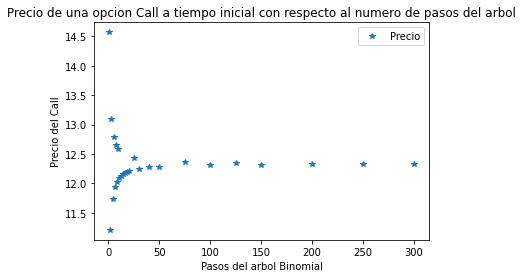

In [29]:
plt.plot(pasos_vec,precios,'*', label='Precio')
plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## 3) Mercado VS Modelo
## a) Saco una opcion del mercado y calculo su precio - NYSE

In [41]:
# Tomo un ticker e invoco al codigo de la clase pasada

from Codigo.data_nyse import *
ticker = 'TSLA'
data = yf.Ticker(ticker)
#Genero el panel
panel_opciones = obtener_panel_opciones_nyse(ticker, True)



c:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calls = calls.append(data.option_chain(vencimiento)[0])
c:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  puts = puts.append(data.option_chain(vencimiento)[1])
c:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calls = calls.append(data.option_chain(vencimiento)[0])
c:\Users\manue\OneDrive\Documents\finanzasCuantitativas\Notebooks\..\Codigo\data_nyse.py:21: FutureWarning: The frame.append method is deprecated and 

In [42]:
panel_opciones

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Bid,Ask
0,TSLA220902C00083330,TSLA,285.908813,C,83.33,4,205.32,3.431043,0.000010,199.50,200.50
1,TSLA220902P00083330,TSLA,285.908813,P,83.33,4,0.01,3.431043,0.500005,0.00,0.00
2,TSLA220902C00100000,TSLA,285.908813,C,100.00,4,195.92,2.859088,0.000010,183.05,183.85
3,TSLA220902P00100000,TSLA,285.908813,P,100.00,4,0.01,2.859088,2.625003,0.00,0.01
4,TSLA220902C00116670,TSLA,285.908813,C,116.67,4,187.79,2.450577,0.000010,166.55,167.45
...,...,...,...,...,...,...,...,...,...,...,...
7967,TSLA240621P02200000,TSLA,285.908813,P,2200.00,662,1300.02,0.129959,0.000010,0.00,0.00
7968,TSLA240621C02250000,TSLA,285.908813,C,2250.00,662,69.46,0.127071,0.250007,0.00,0.00
7969,TSLA240621P02250000,TSLA,285.908813,P,2250.00,662,1387.48,0.127071,0.000010,0.00,0.00
7970,TSLA240621C02275000,TSLA,285.908813,C,2275.00,662,67.00,0.125674,0.250007,0.00,0.00


In [43]:
# Tomo los TTMs y me quedo con alguno de ellos
TTMs = list(set(panel_opciones.TTM.values))
TTMs.sort()

TTM=TTMs[4]
TTM

32

In [44]:
# elijo un tipo de opcion y tomo los strikes
CP = "P"
Ks = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)].Strike.values
Ks_indexes = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)].Strike.index

Ks_indexes

Int64Index([2789, 2791, 2793, 2795, 2797, 2799, 2801, 2803, 2805, 2806,
            ...
            3006, 3008, 3010, 3012, 3015, 3018, 3022, 3024, 3029, 3034],
           dtype='int64', length=119)

In [45]:
#Tomo el ATM strike
K_atm_index = np.abs(Ks - panel_opciones.Spot.values[0]).argmin()

K_ATM = Ks[K_atm_index]
K_ATM
K_ATM_index_df = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP)&(panel_opciones.Strike==K_ATM)].Strike.index[0]
K_ATM_index_df


2848

In [46]:
panel_opciones[panel_opciones.index==543]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Bid,Ask
543,TSLA220902P01220000,TSLA,285.908813,P,1220.0,4,369.75,0.234351,0.00001,0.0,0.0


In [47]:
# Saco de los datos de mercado los parametros necesarios para pricear


CP = 'P'
S = panel_opciones.Spot.values[K_ATM_index_df]

K = panel_opciones.Strike.values[K_ATM_index_df]
T = (panel_opciones.TTM.values[K_ATM_index_df])/365

sigma = panel_opciones.impliedVolatility.values[K_ATM_index_df]

#sigma = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].impliedVolatility.values[0]
try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0 
    
pasos = 2000




In [49]:
#tasa libre de riesgo de Libor1M - https://www.global-rates.com/en/interest-rates/libor/libor.aspx
r = 0.00084  #Libor1M**

   

In [50]:
# Volatilidad sacada del dataframe
sigma

0.5645185150146486

In [51]:
# dividendo sacada de data.info
div

0.0

In [52]:
#spot sacada de data.info
S

285.9088134765625

In [53]:
# Llamo a los 2 pricers y comparo con el precio de mercado

precio_modelo_bin = opcion_americana_bin(CP, S, K, T, r, sigma, div, pasos)
print("Precio Modelo Binomial: ", precio_modelo_bin)

precio_modelo_bs = opcion_europea_bs(CP, S, K, T, r, sigma, div)
print("Precio Modelo BS: ", precio_modelo_bs)

precio_mercado_last = panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Last.values[0] 

precio_mercado_avg = (panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Bid.values[0]#
+panel_opciones[(panel_opciones.TTM == TTM) & (panel_opciones.CallPut == CP) & (panel_opciones.Strike == K_ATM)].Ask.values[0]
)/2

print("Precio Mercado Last: ", precio_mercado_last)

print("Precio Mercado Avg: ", precio_mercado_avg)



Precio Modelo Binomial:  19.442819027605513
Precio Modelo BS:  19.440119674424665
Precio Mercado Last:  20.0
Precio Mercado Avg:  19.575


In [54]:
#Error relativo entre valor de mercado y valor de modelo:

print("Error relativo entre modelo y mercado (en %): ", (precio_mercado_avg-precio_modelo_bs)/precio_mercado_avg*100)

Error relativo entre modelo y mercado (en %):  0.6890438088139699


## b) Saco una opcion del mercado y calculo su precio - BYMA


## Ejercicio